In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cifar10_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


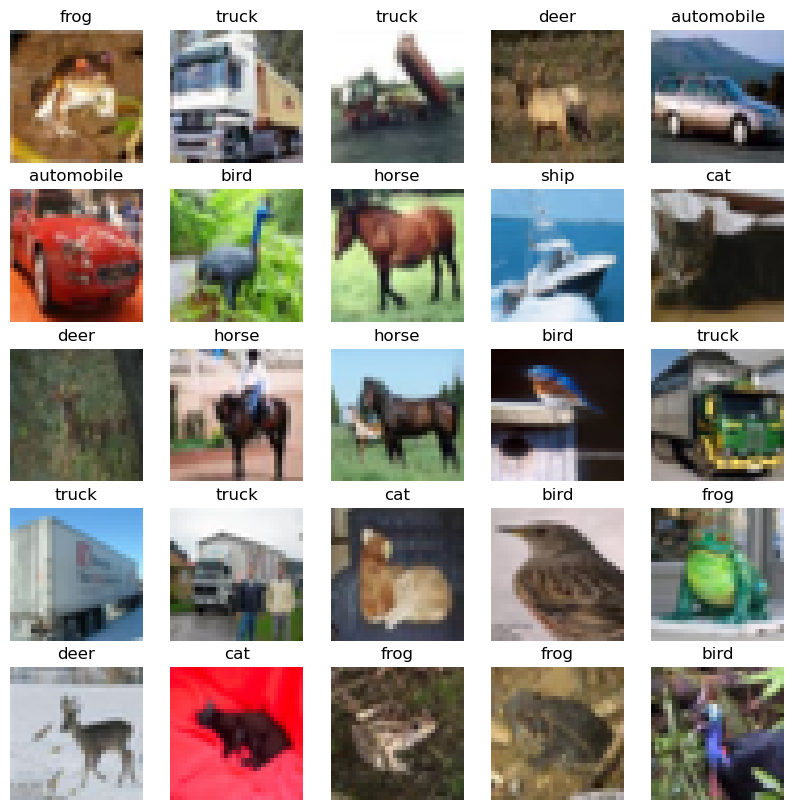

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    label_index = int(y_train[i])
    plt.title(cifar10_labels[label_index])
    plt.axis('off')
plt.show()

In [5]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(cifar10_labels), activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.callbacks import EarlyStopping
EPOCHS = 50
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/50
1563/1563 [==============================] - 33s 15ms/step - loss: 1.8877 - accuracy: 0.3254 - val_loss: 1.7745 - val_accuracy: 0.3750
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7239 - accuracy: 0.3891 - val_loss: 1.6741 - val_accuracy: 0.4007
Epoch 3/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6833 - accuracy: 0.4004 - val_loss: 1.6553 - val_accuracy: 0.4039
Epoch 4/50
1563/1563 [==============================] - 24s 16ms/step - loss: 1.6593 - accuracy: 0.4086 - val_loss: 1.6582 - val_accuracy: 0.4051
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6374 - accuracy: 0.4178 - val_loss: 1.6370 - val_accuracy: 0.4191
Epoch 6/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6198 - accuracy: 0.4251 - val_loss: 1.6725 - val_accuracy: 0.3916
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6077 - accuracy: 0.4280 - val_loss: 1.6078 -

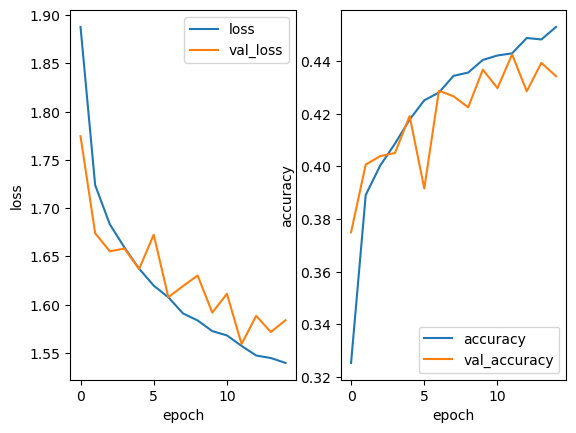

<Figure size 640x480 with 0 Axes>

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.subplot(1,2,1)
plt.plot(loss, label = "loss")
plt.plot(val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc, label = "accuracy")
plt.plot(val_acc, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()


In [16]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)
batch_size = 64

train_generator = gen.flow(X_train, y_train, batch_size=batch_size)


In [18]:
history2 = model.fit(train_generator, steps_per_epoch=X_train.shape[0]//batch_size, epochs=EPOCHS, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/50
781/781 [==============================] - 93s 116ms/step - loss: 2.2343 - accuracy: 0.1720 - val_loss: 22.1720 - val_accuracy: 0.1498
Epoch 2/50
781/781 [==============================] - 78s 96ms/step - loss: 2.1482 - accuracy: 0.1927 - val_loss: 42.0445 - val_accuracy: 0.1503
Epoch 3/50
781/781 [==============================] - 77s 95ms/step - loss: 2.1193 - accuracy: 0.1989 - val_loss: 59.4840 - val_accuracy: 0.1466
Epoch 4/50
781/781 [==============================] - 78s 97ms/step - loss: 2.1062 - accuracy: 0.2047 - val_loss: 73.0888 - val_accuracy: 0.1471
Epoch 4: early stopping


In [10]:
model2 = Sequential()
model2.add(Flatten(input_shape=(32,32,3)))

model2.add(Dense(128, activation='relu'))
model2.add(Dense(len(cifar10_labels), activation='softmax'))

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               393344    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.models import Sequential

model3 = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model3.add(base_model)
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history3 = model.fit(X_train, y_train, epochs=EPOCHS, steps_per_epoch=X_train.shape[0]//batch_size, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/50
781/781 [==============================] - 13s 12ms/step - loss: 3.1846 - accuracy: 0.2097 - val_loss: 2.0264 - val_accuracy: 0.2584
Epoch 2/50
781/781 [==============================] - 12s 16ms/step - loss: 1.9704 - accuracy: 0.2940 - val_loss: 1.8574 - val_accuracy: 0.3094
Epoch 3/50
781/781 [==============================] - 10s 13ms/step - loss: 1.8551 - accuracy: 0.3235 - val_loss: 1.8206 - val_accuracy: 0.3231
Epoch 4/50
781/781 [==============================] - 15s 19ms/step - loss: 1.8108 - accuracy: 0.3384 - val_loss: 1.7973 - val_accuracy: 0.3375
Epoch 5/50
781/781 [==============================] - 10s 13ms/step - loss: 1.7738 - accuracy: 0.3542 - val_loss: 1.7805 - val_accuracy: 0.3462
Epoch 6/50
781/781 [==============================] - 10s 13ms/step - loss: 1.7656 - accuracy: 0.3547 - val_loss: 1.7717 - val_accuracy: 0.3559
Epoch 7/50
781/781 [==============================] - 9s 12ms/step - loss: 1.7568 - accuracy: 0.3580 - val_loss: 1.7719 - val_accuracy: 

In [23]:
batch_sizes = [8, 16, 32, 64, 128, 256]
histories = []

for batch_size in batch_sizes:
    print(f"Ustawiona wielość zbioru: {batch_size}")
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test, y_test))
    histories.append(history)

Ustawiona wielość zbioru: 8
Epoch 1/5
6250/6250 [==============================] - 46s 7ms/step - loss: 1.9095 - accuracy: 0.3071 - val_loss: 1.7863 - val_accuracy: 0.3572
Epoch 2/5
6250/6250 [==============================] - 46s 7ms/step - loss: 1.8039 - accuracy: 0.3483 - val_loss: 1.7531 - val_accuracy: 0.3696
Epoch 3/5
6250/6250 [==============================] - 70s 11ms/step - loss: 1.7710 - accuracy: 0.3581 - val_loss: 1.7364 - val_accuracy: 0.3746
Epoch 4/5
6250/6250 [==============================] - 47s 8ms/step - loss: 1.7495 - accuracy: 0.3680 - val_loss: 1.7582 - val_accuracy: 0.3598
Epoch 5/5
6250/6250 [==============================] - 54s 9ms/step - loss: 1.7299 - accuracy: 0.3729 - val_loss: 1.7222 - val_accuracy: 0.3854
Ustawiona wielość zbioru: 16
Epoch 1/5
3125/3125 [==============================] - 37s 10ms/step - loss: 1.8904 - accuracy: 0.3206 - val_loss: 1.7494 - val_accuracy: 0.3725
Epoch 2/5
3125/3125 [==============================] - 31s 10ms/step - loss: 